In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 
              'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 
              'sqft_lot':int, 'view':int}

In [2]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

C:\Users\Xiaoxuan\Anaconda2\envs\py33\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [3]:
def polynomial_sframe(feature, degree):
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature.apply(lambda x: x ** power)
    return poly_dataframe

### Ridge Regression with L2 Penalty

In [4]:
l2_small_penalty = 1.5e-5

poly15_data = polynomial_sframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [5]:
# help(linear_model.ridge)

In [6]:
pd.DataFrame(model.coef_, poly15_data.columns)

,0
power_1,1.248733e+02
power_2,-4.773760e-02
power_3,3.014462e-05
power_4,-2.444199e-09
power_5,-1.941537e-13
power_6,8.540857e-18
power_7,1.511421e-21
power_8,8.279791e-26
power_9,6.526031e-31
power_10,-3.278950e-34


In [7]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [8]:
def ridge_regression_on_poly15(data, l2_penalty):
    poly15_data = polynomial_sframe(data['sqft_living'], 15)
    model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
    model.fit(poly15_data, data['price'])
    return model.coef_

In [9]:
l2_small_penalty=1e-9

coeffs = ridge_regression_on_poly15(set_1, l2_small_penalty).reshape(15,1)
coeffs = np.hstack((coeffs, ridge_regression_on_poly15(set_2, l2_small_penalty).reshape(15,1))) 
coeffs = np.hstack((coeffs, ridge_regression_on_poly15(set_3, l2_small_penalty).reshape(15,1))) 
coeffs = np.hstack((coeffs, ridge_regression_on_poly15(set_4, l2_small_penalty).reshape(15,1))) 

In [10]:
pd.DataFrame(coeffs, poly15_data.columns)

,0,1,2,3
power_1,5.446694e+02,8.593626e+02,-7.553960e+02,1.119446e+03
power_2,-3.554476e-01,-8.181183e-01,9.755796e-01,-9.837602e-01
power_3,1.224464e-04,4.288800e-04,-4.589460e-04,3.387709e-04
power_4,-1.171753e-08,-9.127706e-08,7.779582e-08,3.603772e-08
power_5,-3.905125e-13,-2.696045e-12,7.150130e-12,-4.378140e-11
power_6,-1.390761e-17,3.739803e-15,-2.886019e-15,5.771917e-15
power_7,1.478603e-20,-1.427118e-19,-2.136780e-20,7.667953e-19
power_8,6.874920e-25,-6.307948e-23,3.380852e-23,-9.492978e-23
power_9,-7.572042e-29,-1.445596e-27,2.191781e-27,-1.960308e-26
power_10,-1.040973e-32,7.443213e-31,-1.970677e-31,-2.108804e-32


In [11]:
l2_small_penalty=1.23e2

coeffs = ridge_regression_on_poly15(set_1, l2_small_penalty).reshape(15,1)
coeffs = np.hstack((coeffs, ridge_regression_on_poly15(set_2, l2_small_penalty).reshape(15,1))) 
coeffs = np.hstack((coeffs, ridge_regression_on_poly15(set_3, l2_small_penalty).reshape(15,1))) 
coeffs = np.hstack((coeffs, ridge_regression_on_poly15(set_4, l2_small_penalty).reshape(15,1))) 

In [12]:
pd.DataFrame(coeffs, poly15_data.columns)

,0,1,2,3
power_1,2.328068e+00,2.097569e+00,2.289063e+00,2.085962e+00
power_2,3.536216e-04,3.908175e-04,4.124722e-04,4.050358e-04
power_3,3.319697e-08,6.671899e-08,6.088353e-08,7.468646e-08
power_4,2.000825e-12,8.900030e-12,6.585722e-12,1.130966e-11
power_5,1.114926e-16,9.726399e-16,6.152782e-16,1.458644e-15
power_6,6.577861e-21,9.697337e-20,5.644466e-20,1.735613e-19
power_7,4.129395e-25,9.505645e-24,5.288344e-24,2.016096e-23
power_8,2.703938e-29,9.444910e-28,5.070914e-28,2.346053e-27
power_9,1.816148e-33,9.571913e-32,4.946573e-32,2.756361e-31
power_10,1.238243e-37,9.869452e-36,4.880438e-36,3.270431e-35


### k-fold Cross Validation

In [13]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [14]:
def get_segment_indexes(num_observation, num_segment, i):
        start = i * num_observation // num_segment
        end = (i+1) * num_observation // num_segment - 1
#         print(i, (start, end))
        return(start, end)

In [15]:
def ridge_regression_on_poly15_2(data, l2_penalty):
    poly15_data = polynomial_sframe(data['sqft_living'], 15)
    model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
    model.fit(poly15_data, data['price'])
    return model

In [16]:
def k_fold_cross_validation(k, l2_penalty, data, feature_data):
    n = data.shape[0]
    avg_rss = []
    for i in range(1,k):
        start, end = get_segment_indexes(n, k, i)
        set_valid = data[start:end+1]
        set_train = data[0:start].append(data[end+1:n])
        model = ridge_regression_on_poly15_2(set_train, l2_penalty)
        poly15_set_valid = feature_data[start:end+1]
        rss = ((model.predict(poly15_set_valid) - set_valid['price']) ** 2).sum()
        avg_rss.append(rss)
        return np.array(avg_rss).mean()

In [17]:
poly15_valid_shuffled = polynomial_sframe(train_valid_shuffled['sqft_living'], 15) # precompute 15 polynomials
l2s = np.logspace(3, 9, num=13)

min_rss = 1e99
min_idx = -1

for l in range(0, l2s.size):
    curr_rss = k_fold_cross_validation(10, l2s[l], train_valid_shuffled, poly15_valid_shuffled)
    if curr_rss < min_rss:
        min_rss = curr_rss
        min_idx = l

print('Lowest average validation error (RSS = %E) was achieved when L2 penalty is %.E' % (min_rss, l2s[min_idx]))

Lowest average validation error (RSS = 2.533624E+14) was achieved when L2 penalty is 1E+03


In [18]:
model = linear_model.Ridge(alpha=l2s[min_idx], normalize=True)
model.fit(poly15_valid_shuffled, train_valid_shuffled['price'])
poly15_test = polynomial_sframe(test['sqft_living'], 15)
rss = ((model.predict(poly15_test) - test['price']) ** 2).sum()
print('Test data RSS is %E' % rss)

Test data RSS is 2.838569E+14


### Ridge Regression Gradient Descent

In [19]:
def get_numpy_data(data, input_features, ouput_feature):
    N = len(data[input_features[0]])
    data['constant'] = np.ones(data[input_features[0]].shape) # add a constant column
    features_matrix = data['constant'].reshape(N,1)
    for i in range(0, len(input_features)):
        features_matrix = np.hstack((features_matrix, data[input_features[i]].reshape(N,1)))
    output_vector = np.array(data[ouput_feature])
    return np.array(features_matrix), output_vector

def predict_outcome(features_matrix, weights):
    if np.any(np.array(features_matrix.shape) > 1):
        return features_matrix.dot(weights)
    return features_matrix * weights

def ridge_regression_gradient_descent(features_matrix, output_vector, initial_weights, step_size, 
                                      l2_penalty, max_iter, is_normalized=True):
    weights = np.array(initial_weights)
    iterator = 0
    while iterator < max_iter:
        partial = -2.0 * features_matrix.T.dot(output_vector - predict_outcome(features_matrix, weights)) 
#         gradient_magnitude = np.sqrt(((output_vector - predict_outcome(features_matrix, weights)) ** 2).sum())
        if is_normalized:
            if iterator == 1:
                print('-- not regularizing the constant')
            weights[0] = weights[0] - step_size * partial[0]
            weights[1::] = (1.0 - 2.0 * step_size * l2_penalty) * weights[1::] - step_size * partial[1::]
        else:
            weights = (1.0 - 2.0 * step_size * l2_penalty) * weights - step_size * partial
        
#         if iterator % 100 == 0:
#             print('%4d gradient magnitude is: %.5E' % (iterator, gradient_magnitude))
        iterator = iterator + 1
    
    return weights

In [20]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [21]:
simple_features = ['sqft_living']
my_output = ['price']
(simple_feature_matrix, simple_output) = get_numpy_data(train_valid_shuffled, simple_features, my_output)
(simple_test_feature_matrix, simple_test_output) = get_numpy_data(test, simple_features, my_output)

step_size = 1e-12
max_iter = 1000
l2_penalty = 0
initial_weights = np.zeros((2,1))
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, simple_output, 
                                                            initial_weights, step_size, l2_penalty, 
                                                            max_iter)

-- not regularizing the constant


In [22]:
print('Weights from 0 penalty is %.1f and %.1f' % (simple_weights_0_penalty[0], simple_weights_0_penalty[1]))

Weights from 0 penalty is -0.2 and 263.3


In [23]:
l2_penalty = 1e11
initial_weights = np.zeros((2,1))
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, simple_output, 
                                                            initial_weights, step_size, l2_penalty, max_iter)

-- not regularizing the constant


In [24]:
print('Weights from high penalty is %.1f and %.1f' % (simple_weights_high_penalty[0], simple_weights_high_penalty[1]))

Weights from high penalty is 10.3 and 131.7


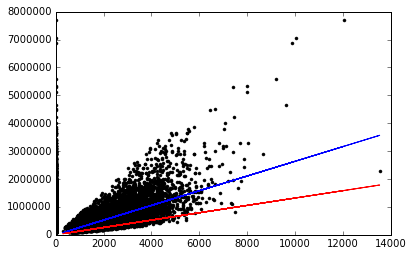

In [25]:
plt.plot(simple_feature_matrix,simple_output,'k.',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [26]:
print( 'RSS on the test data using zero weights is %.3E' 
      % sum((simple_test_output - predict_outcome(simple_test_feature_matrix, np.zeros((2,1)))) ** 2))

RSS on the test data using zero weights is 9.279E+14


In [27]:
print( 'RSS on the test data using weights from 0 penalty is %.3E' 
      % sum((simple_test_output - predict_outcome(simple_test_feature_matrix, simple_weights_0_penalty)) ** 2))

RSS on the test data using weights from 0 penalty is 1.431E+14


In [28]:
print( 'RSS on the test data using weights from high penalty is %.3E' 
      % sum((simple_test_output - predict_outcome(simple_test_feature_matrix, simple_weights_high_penalty)) ** 2))

RSS on the test data using weights from high penalty is 3.391E+14


In [29]:
simple_features = ['sqft_living', 'sqft_living15']
my_output = ['price']
(simple_feature_matrix, simple_output) = get_numpy_data(train_valid_shuffled, simple_features, my_output)
(simple_test_feature_matrix, simple_test_output) = get_numpy_data(test, simple_features, my_output)

step_size = 1e-12
max_iter = 1000
l2_penalty = 0
initial_weights = np.zeros((len(simple_features)+1,1))
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, simple_output, 
                                                            initial_weights, step_size, l2_penalty, 
                                                            max_iter)

-- not regularizing the constant


In [30]:
print('Weights from 0 penalty for sqft_living is %.1f' % (simple_weights_0_penalty[1]))

Weights from 0 penalty for sqft_living is 244.3


In [31]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, simple_output, 
                                                            initial_weights, step_size, l2_penalty, 
                                                            max_iter)

-- not regularizing the constant


In [32]:
print('Weights from high penalty for sqft_living is %.1f' % (simple_weights_high_penalty[1]))

Weights from high penalty for sqft_living is 95.4


In [33]:
print( 'RSS on the test data using zero weights is %.3E' 
      % sum((simple_test_output - predict_outcome(simple_test_feature_matrix, np.zeros((len(simple_features)+1,1)))) ** 2))

RSS on the test data using zero weights is 9.279E+14


In [34]:
print( 'RSS on the test data using weights from 0 penalty is %.3E' 
      % sum((simple_test_output - predict_outcome(simple_test_feature_matrix, simple_weights_0_penalty)) ** 2))

RSS on the test data using weights from 0 penalty is 1.427E+14


In [35]:
print( 'RSS on the test data using weights from high penalty is %.3E' 
      % sum((simple_test_output - predict_outcome(simple_test_feature_matrix, simple_weights_high_penalty)) ** 2))

RSS on the test data using weights from high penalty is 2.467E+14


In [36]:
simple_test_output[0]

array([ 323000.])

In [37]:
outcome_0_penalty = predict_outcome(simple_test_feature_matrix, simple_weights_0_penalty)
outcome_0_penalty[0]

array([ 512693.33773354])

In [38]:
outcome_high_penalty = predict_outcome(simple_test_feature_matrix, simple_weights_high_penalty)
outcome_high_penalty[0]

array([ 374976.85225134])